### Laboratorio 2 – Proyecto de Predicción de Predicción de Bicicletas

En esta sección ud. estará a cargo de evaluar como se puede realizar la predicción de bicicletas de un local de alquiler.  Como científico de datos tiene la labor de predecir la siguiente demanda del local por medio de un modelo de machine learning utilizando scikit-learn.

### Copiando el Dataset al Computador

Primero debemos adquirir el dataset.  Nuestro dataset a descargar está en la siguiente dirección:
- https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

### Descargar los datos

Haremos una función para descargar los datos de la web, esto es muy útil para futuro.

In [2]:
import os
import urllib.request

DS_EXTRACT_PATH = os.path.join(os.getcwd(), "datasets", "capitalbikeshare")
DS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"


def download_dataset(dataset_url=DS_URL, dataset_pc_path=DS_EXTRACT_PATH):
    if not os.path.isdir(dataset_pc_path):
        os.makedirs(dataset_pc_path)
    parts = os.path.split(dataset_url)
    zipname = parts[-1]
    zip_path = os.path.join(dataset_pc_path, zipname)
    urllib.request.urlretrieve(dataset_url, zip_path)

In [3]:
# Salida Esperada:
# Dataset en formato zip descargado en: <esta_carpeta>/datasets/capitalbikeshare/<nombre_del_zip>
download_dataset()

### Descomprimir los datos

Haremos una función para descomprimir el dataset en esta carpeta y finalmente borraremos el zip file.

In [4]:
from zipfile import ZipFile
import numpy as np

def unzip_dataset(dataset_pc_path=DS_EXTRACT_PATH):
    #
    # SU CODIGO AQUI
    zip_filename = os.path.basename(DS_URL)
    zip_path = os.path.join(dataset_pc_path, zip_filename)
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_pc_path)
    os.remove(zip_path)
    #

In [5]:
unzip_dataset()
## Salida Esperada:
# Dataset en formato csv descomprimodo en: <esta_carpeta>/datasets/capitalbikeshare/
# archivos: hour.csv, day.csv, Readme.txt

### Cargar y explorar el dataset

Ahora cargue el dataset y explore las diferentes variables del dataset:
- hour.csv

Cargar el dataset con pandas

In [6]:
import pandas as pd

def load_bike_hourly_data(bike_dataset_path=DS_EXTRACT_PATH):
    # SU CODIGO AQUI
    csv_path = os.path.join(bike_dataset_path, "hour.csv")
    return pd.read_csv(csv_path)

Explorar las primeras 48 filas

In [7]:
bikeshare = load_bike_hourly_data()
# SU CODIGO AQUI
bikeshare.head(48)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Desplegar información del dataset

Despliegue información escencial del dataset

In [8]:
# SU CODIGO AQUI
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Visualizando el dataset
El dataset, como observó, tiene el número de personas para cada hora del día desde Enero del 2011 hasta Diciembre 2017. El número de personas que manejan se divide entre casuales y registrados sumados en la columna 'cnt'.

- Grafique el número de manejadores de bicicleta de los primeros 10 días del dataset.  Observe el dataset y note que el día se divide en 24 horas.  Puede ver la cantidad de rentas por horas allí.

El dataset es difícil de analizar normalmente, tiene altibajos, en especial cuando las personas van del trabajo a la casa y los fines de semana.  De las columnas anteriores también tenemos velocidad de viento, humedad, temperatura.  Todo esto afecta el alquiler de las bicicletas.  Trataremos de capturar estas características con un modelo.

<Axes: xlabel='dteday'>

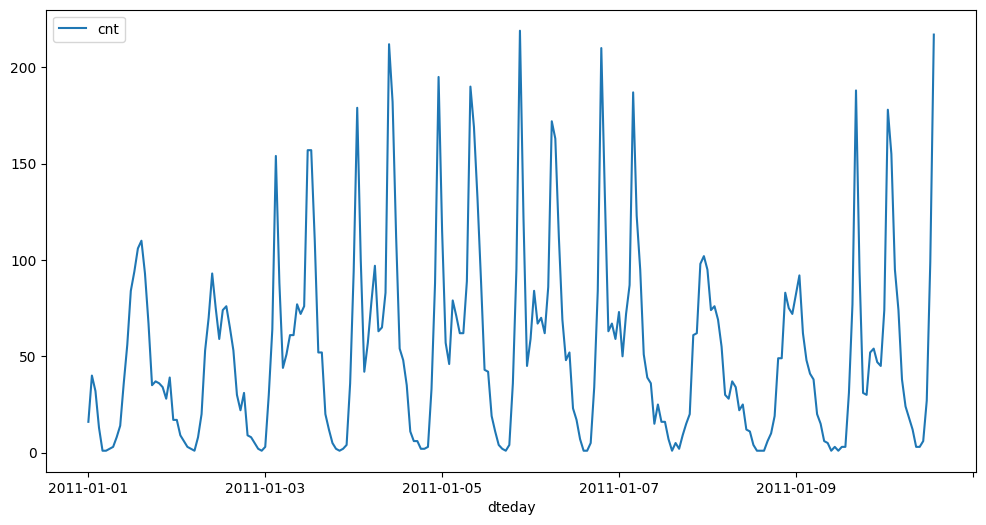

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# SU CODIGO AQUI
bikeshare[:24*10].plot(x='dteday', y='cnt', figsize=(12,6))

### Gane más información de la distribución del dataset

Simplemente grafique con hist() para verificar/validar la distribución de los datos y ganar más información del dataset

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

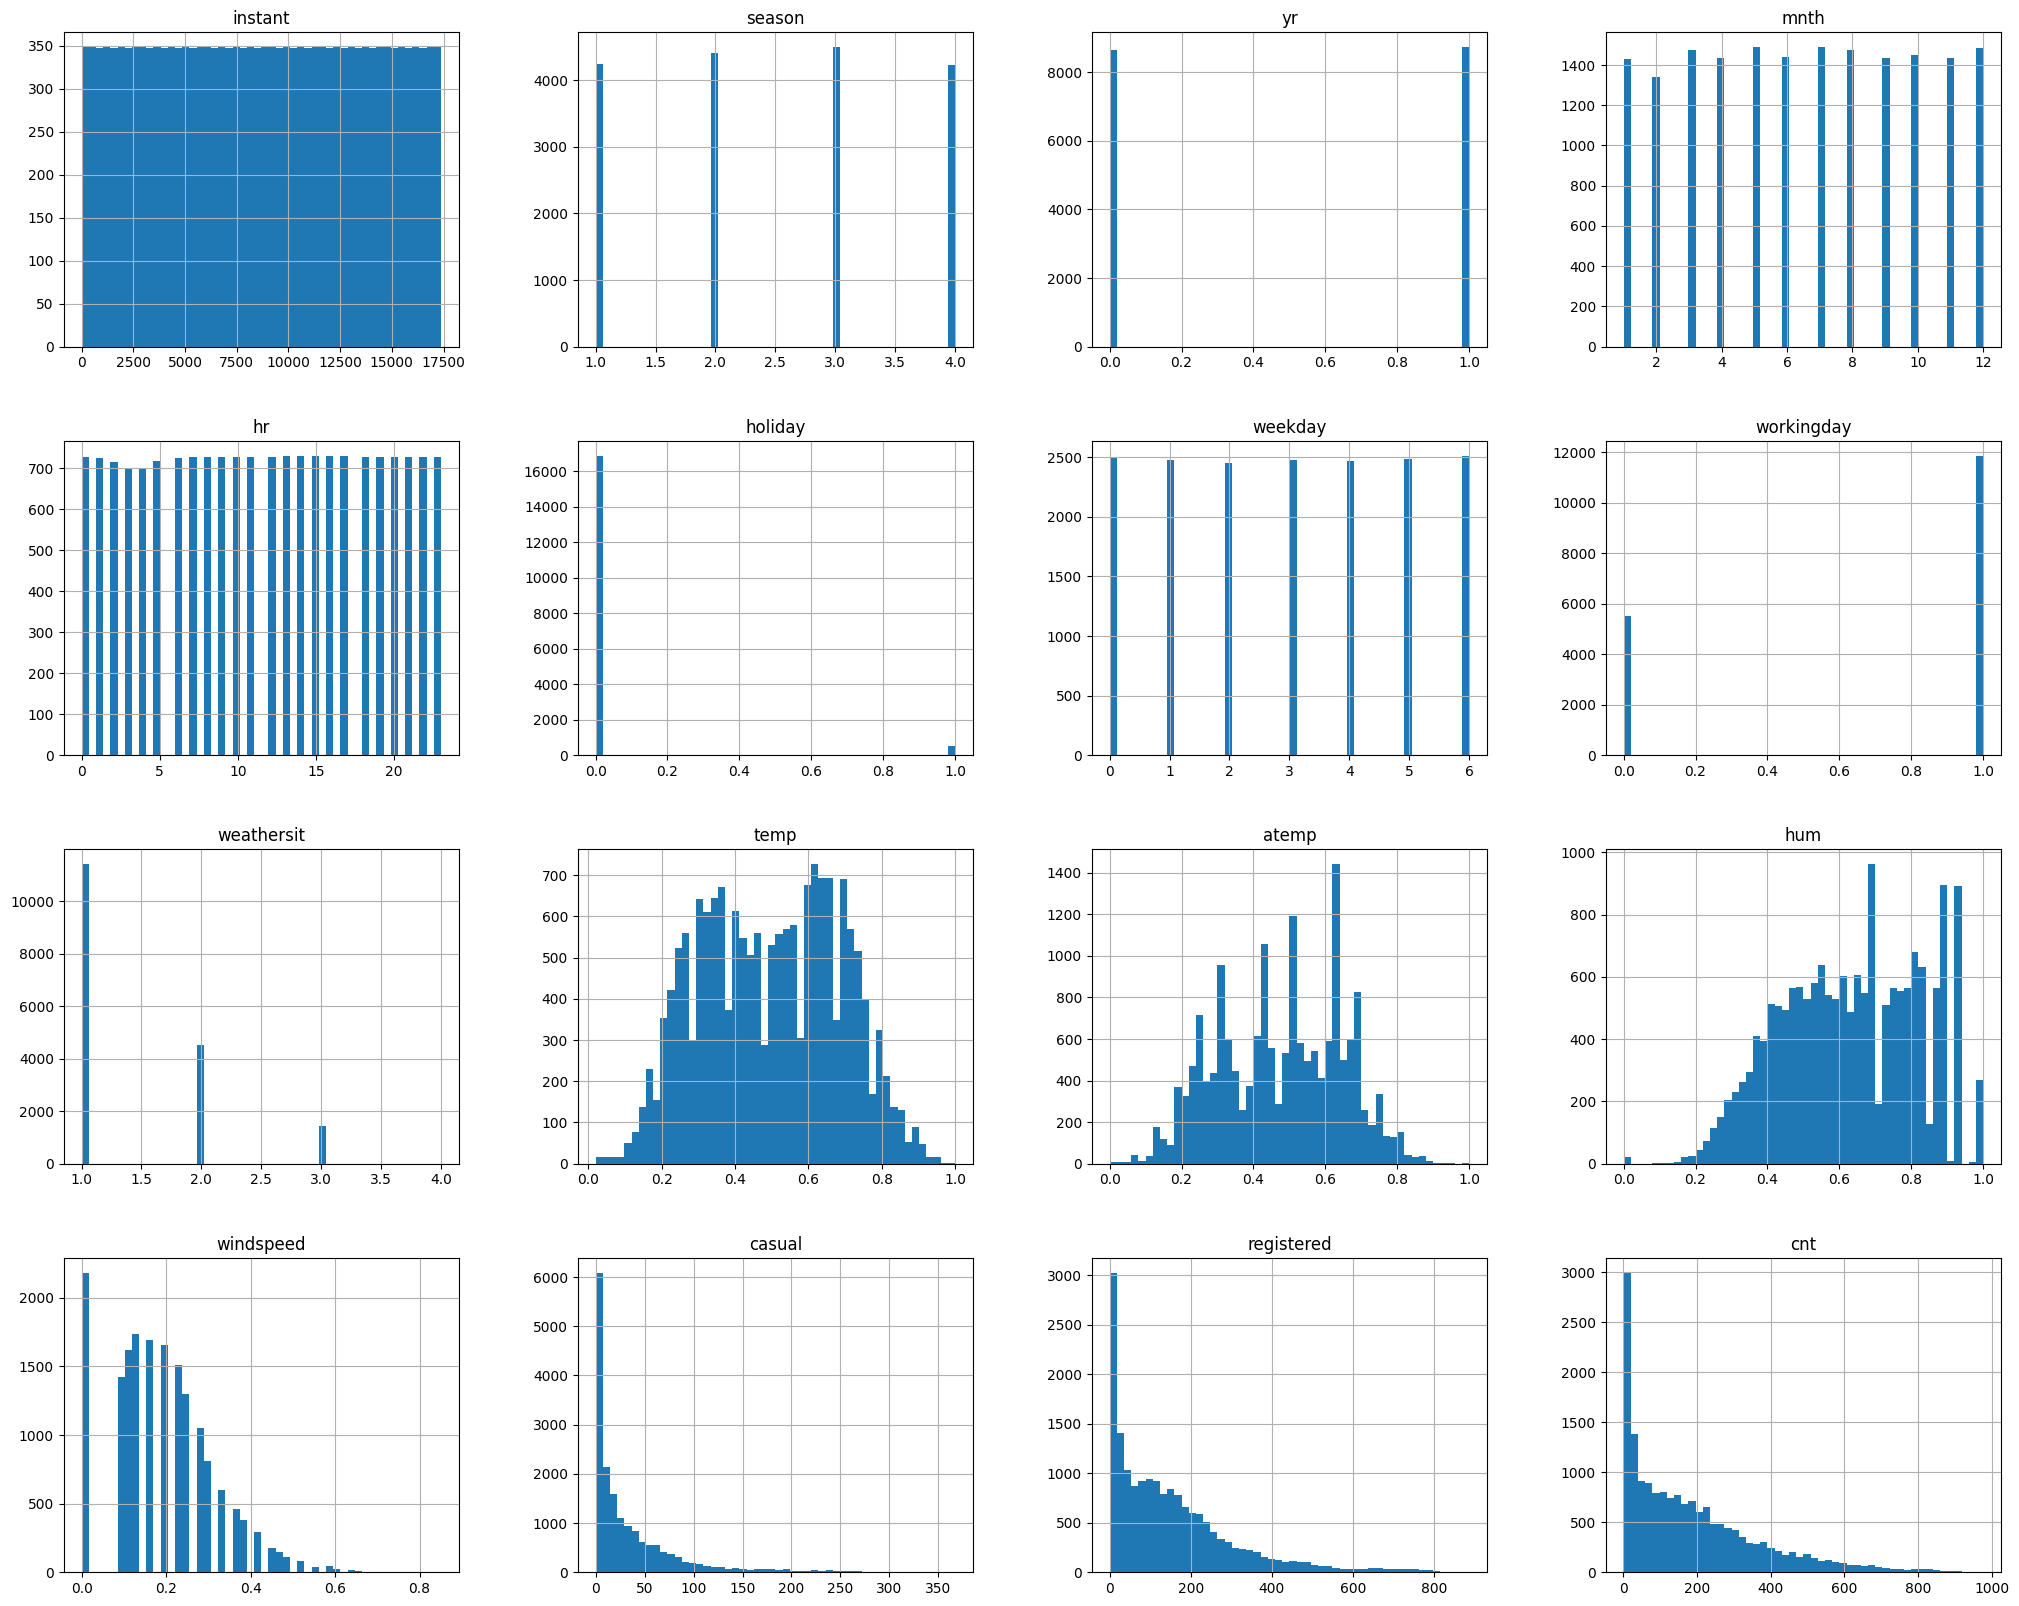

In [11]:
%matplotlib inline
from matplotlib import pyplot

# SU CODIGO AQUI
bikeshare.hist(bins=50, figsize=(25, 20))

### Variables Dummy - Transformación de Data Categórica

Los datos categóricos como temporada, mes, y año deben ser transformados a números debido a que los modelos solo trabajan con esto.  También tendremos variables binarias.  La acción la realizaremos com pandas y la función:
 - get_dummies()
 - columnas dummy = 'season', 'weathersit', 'mnth', 'hr', 'weekday'
 - columnas a borrar = 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr'

In [12]:
dummy_cols = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_cols:
    dummies = pd.get_dummies(bikeshare[each], prefix=each, drop_first=False)
    bikeshare = pd.concat([bikeshare, dummies], axis=1)

drop_cols = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = bikeshare.drop(drop_cols, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0.22,0.80,0.0,8,32,40,True,False,...,False,False,False,False,False,False,False,False,False,True
2,0,0,0.22,0.80,0.0,5,27,32,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0.24,0.75,0.0,3,10,13,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,0.24,0.75,0.0,0,1,1,True,False,...,False,False,False,False,False,False,False,False,False,True


### Escalar el Dataset
- variables a escalar = 'casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed'

In [13]:
to_scale = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in to_scale:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data[each] = (data[each] - mean)/std

### Separación del Dataset
Separar el dataset en Training y Test
- 20% test set
- Campos de Test = 'cnt', 'casual', 'registered'
- Campos de Train = todos los demas

In [14]:
# Separate the data into features and targets
from sklearn.model_selection import train_test_split

# SU CODIGO AQUI
target_fields = ['cnt', 'casual', 'registered']
features = data.drop(target_fields, axis=1)
targets = data[target_fields]

X_train, X_test, Y_train, Ytest = train_test_split(features, targets, test_size=0.2, random_state=42)

### Entrenamiento

Entrenar el modelo basado en el regresor KNeighobrsRegressor
- n_neighbors = 4
- n_jobs = 4

In [15]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

# SU CODIGO AQUI
knn = neighbors.KNeighborsRegressor(n_neighbors=4, n_jobs=4)
knn.fit(X_train, Y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,4


### Guardar el Modelo 

Una parte importante es que luego de entrenar podríamos guardar el modelo.  Este paso se realiza luego de haber evaluado varios y validar que cumple con las métricas.  A manera de prueba lo realizaremos antes, sin embargo recordar que es parte de los últimos pasos.

In [16]:
# Guardar el modelo
import pickle

# SU CODIGO AQUI
model_filename = 'knn_bike_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(knn, file)

print(f"Modelo guardado en el archivo: {model_filename}")

Modelo guardado en el archivo: knn_bike_model.pkl


### Cargar el Modelo

Cuando poseemos la aplicación final, por ejemplo una aplicación por celular o una aplicación web, podemos 'consumir' el modelo llamandolo para realizar nuestras predicciones.  Para esto el modelo debe estar disponible desde una ubicación conocida en la máquina o dispositivo a ejecutar.

In [17]:
# Cargar el modelo

# SU CODIGO AQUI
model_filename = 'knn_bike_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Modelo cargado exitosamente.")

Modelo cargado exitosamente.


### Realizar predicciones

Realizar las predicciones con el modelo de los datos de test

In [18]:
# SU CODIGO AQUI
prediction = loaded_model.predict(X_test)
print(prediction)

[[ 1.27647597  2.55194613  0.69843437]
 [-0.52215856 -0.48526932 -0.46768062]
 [-0.46840626 -0.56639694 -0.37683597]
 ...
 [-0.65585017 -0.54611504 -0.6080769 ]
 [ 1.00633623  0.44769837  1.06016126]
 [ 0.10632983 -0.54104456  0.30367306]]


### Evaluar el modelo por medio de métricas

Evaluar el modelo por medio de las métricas de error medio cuadrado

In [19]:
# SU CODIGO AQUI
mse = mean_squared_error(Ytest, prediction)
print(f"Error Medio Cuadrado: {mse}")

Error Medio Cuadrado: 0.3076097776264493


### Graficar los resultados

Graficar los resultados de la predicción vs los resultados de las pruebas

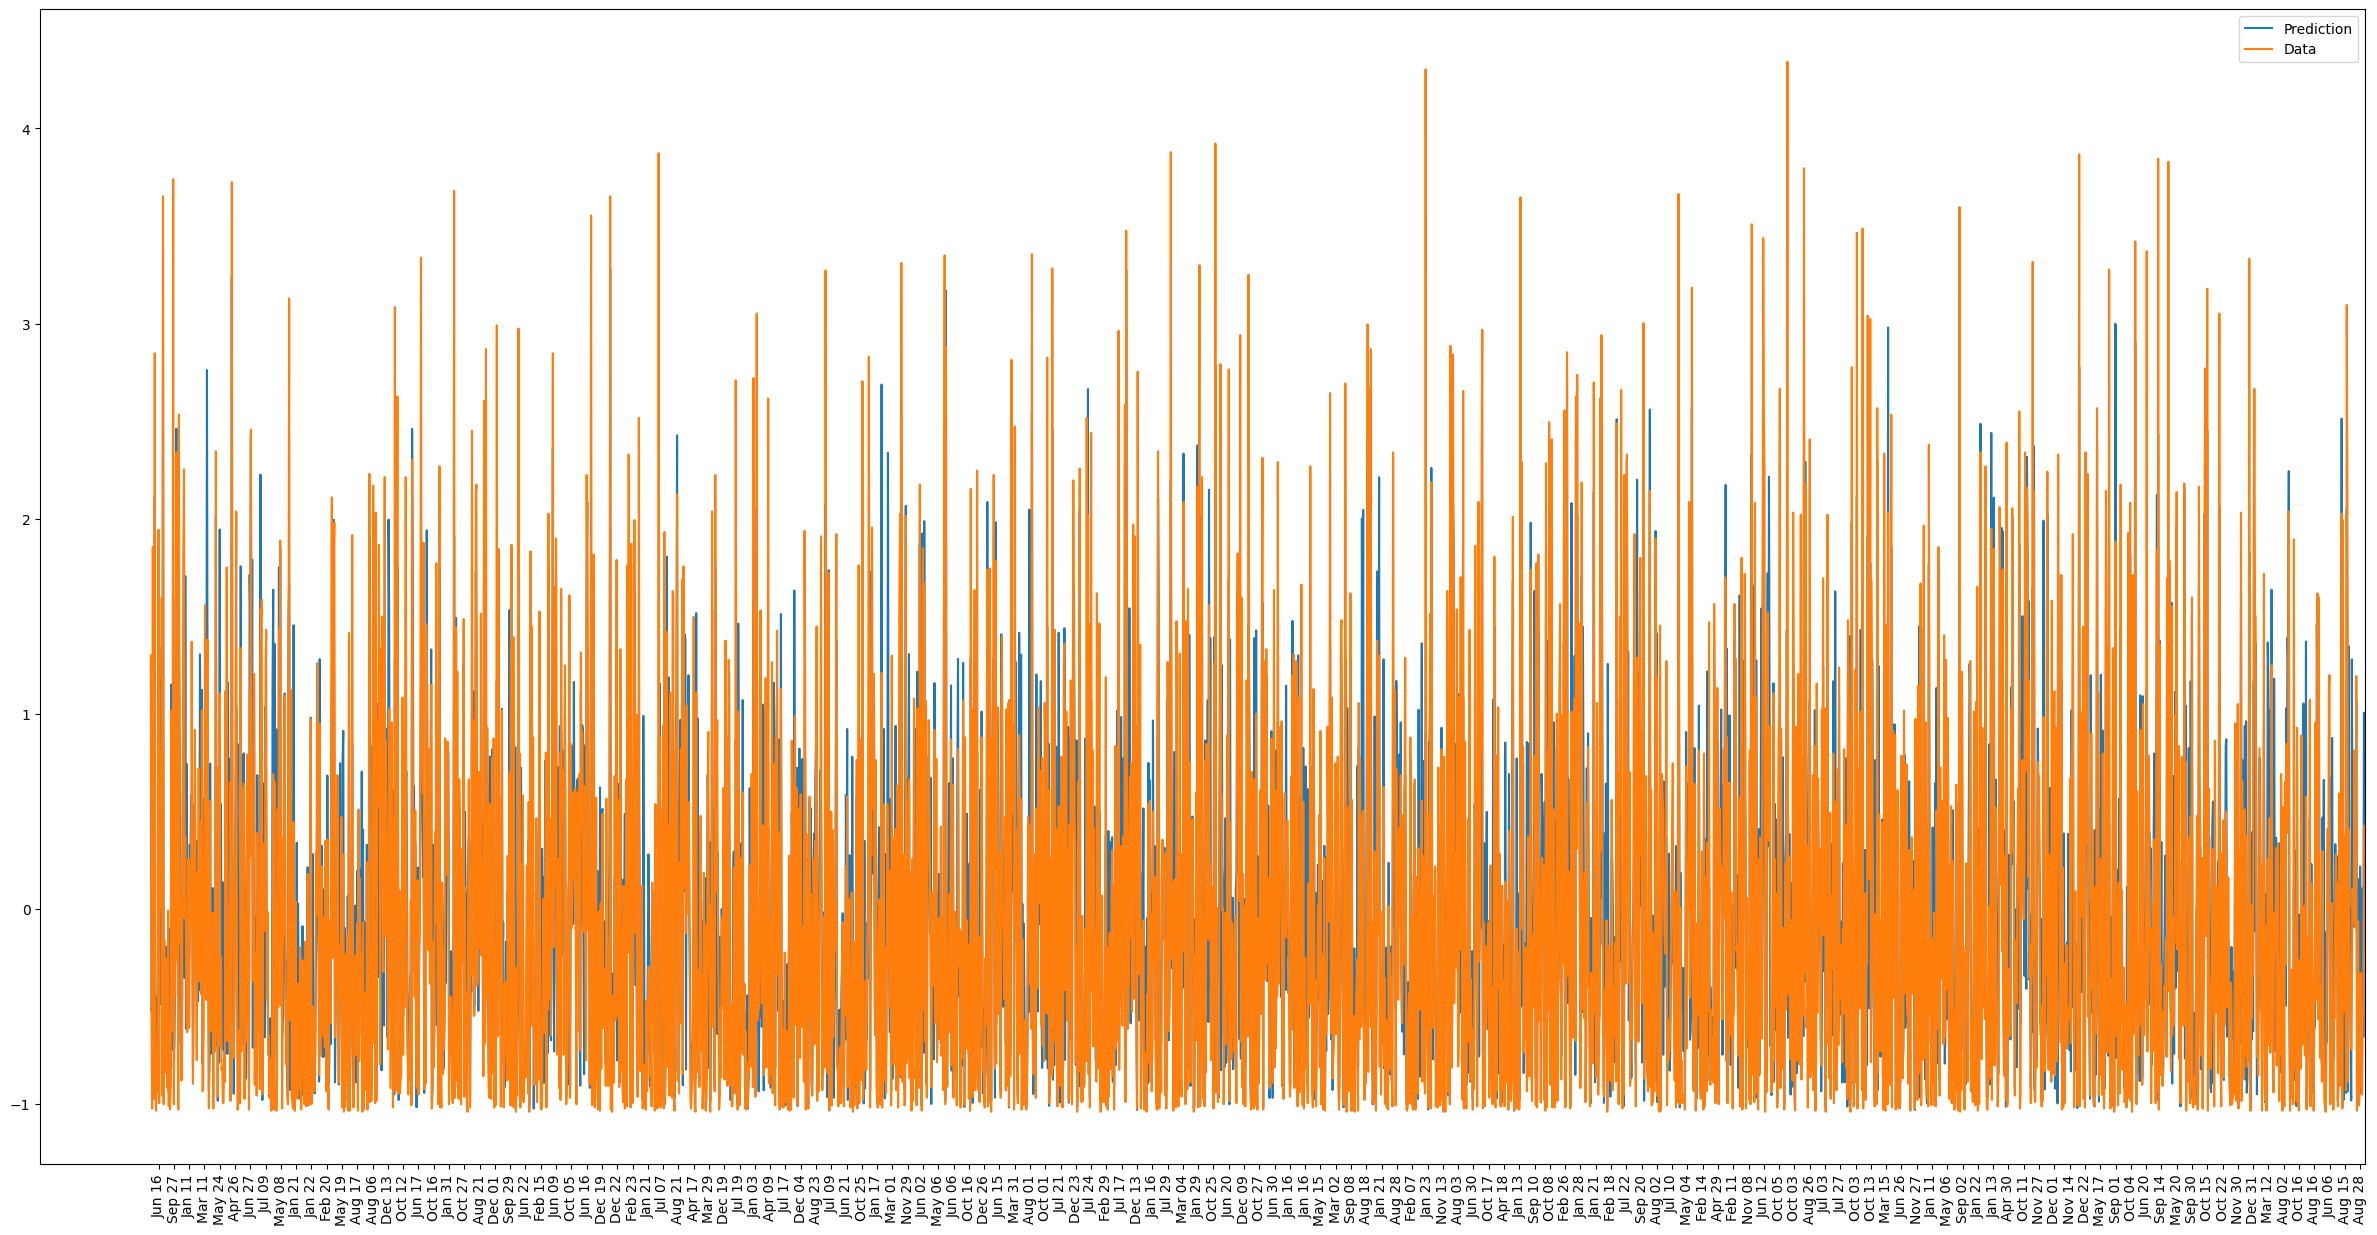

In [21]:
# PUEDE UTILIZAR ESTE CODIGO O HACER EL SUYO

# SU CODIGO AQUI

fig, ax = pyplot.subplots(figsize=(30,15))


ax.plot(prediction[:,0], label='Prediction')
ax.plot(Ytest.cnt.values, label='Data')
ax.set_xlim(right=len(prediction))
ax.legend()

dates = pd.to_datetime(bikeshare.loc[Ytest.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=90)